In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import joblib
import time

from module import MlfcsTrainer
import metrics
mypalette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#7f7f7f','#bcbd22','#17becf']
palette2 = ['#719b78','#6a73a4','#bc8977']
palette3 = ['#ffffff','#bc8977','#719b78','#6a73a4']

Figure 1 : Select 2 ACF for the 4 models

In [2]:

res = pd.read_pickle('../dat/training_set_4models.pk')
models = ['MB', 'FBM', 'CTRW', 'RWF']
idx_long = {'MB': 495778, 'FBM': 131487, 'CTRW': 99804, 'RWF': 8839}
idx_short = {'MB': 507756, 'FBM': 213539, 'CTRW': 211631, 'RWF': 8826}

acf = pd.DataFrame(columns=['G 0.25', 'G 1.5', 'alpha', 'D', 'Model'])

for model in models:
    g_long = res.loc[idx_long[model], 'G'].iloc[0]  # Retrieve the vector
    g_short = res.loc[idx_short[model], 'G'].iloc[1]  # Retrieve the vector
    alpha = res.loc[idx_long[model], 'alpha'].iloc[1]  # Retrieve alpha
    D = res.loc[idx_long[model], 'D'].iloc[1]  # Retrieve D

    # Add row to DataFrame
    row = {
        'G 0.25': g_short.values if hasattr(g_short, 'values') else g_short,
        'G 1.5': g_long.values if hasattr(g_long, 'values') else g_long,
        'alpha': alpha,
        'D': D,
        'Model': model
    }
    acf = pd.concat([acf, pd.DataFrame([row])], ignore_index=True)

    # Plotting
    plt.plot(g_short, label="0.25")
    plt.plot(g_long, label="1.5")
    plt.legend()
    plt.title(f'Model = {model}')
    #plt.show()



KeyboardInterrupt: 

Initializing module with the trained dataset

In [9]:
Module = joblib.load('../data/new_model_trained_4modelsDlast.pk')

In [3]:
Module = joblib.load('../data/model_trained_4models_grid.pk')

You can choose the one you've trained with Trainer.ipynb

In [3]:
#Module = joblib.load('../dat/new_model_trained.pk')

In [11]:
#Compute your test
data = []
for i in range(4):
    path = '/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/Datas/FCS_RWF_2s/data_rwf'+str(i)+'.pk'
    data.append(pd.read_pickle(path))


data_rwf = pd.concat(data)
data_rwf.loc[data_rwf['Model']=='RWF','D'] = 2*data_rwf.loc[data_rwf['Model']=='RWF','D']
data_rwf = data_rwf.loc[data_rwf['D']<10,:]
#data_test['Time window'] = 1.5
#res = Module.test(data_test)
#res['Time window'] = 2.0


In [12]:
dat = pd.read_pickle('../dat/result_test4modelsDnew.pk')


In [13]:
idx = (dat['Model']=='MB')&(dat['Time window']==2.0)
print(idx.sum())

1876


In [14]:
res = pd.concat((data_rwf.sample(n=idx.sum()),dat)).reset_index(drop=True)
del dat
del data_rwf

In [15]:
res.to_pickle('../dat/test_grid.pk')

In [4]:
res = pd.read_pickle('../dat/test_grid.pk').sample(n=10)
res = Module.test(res)

Using  8  cores


In [2]:
from module import MlfcsTrainer
import pandas as pd
import joblib
import os
import numpy as np

datasets = pd.read_pickle('../dat/test_grid.pk')

Module = joblib.load('../data/model_trained_4models_grid.pk')

#res = Module.test(test_set)

#res.to_pickle('res_test_grid.pk')


# Define the number of chunks and output folder
num_chunks = 40  # Replace with your desired number of chunks
output_folder = '../dat/res_4models_grid/'  # Replace with your desired folder path
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Split the dataset into chunks
chunks = np.array_split(datasets, num_chunks)

# Process each chunk
for i, chunk in enumerate(chunks):
    print(f'Processing chunk {i+1}/{num_chunks}')

    # Apply the prediction
    processed_chunk = Module.test(chunk)

    # Save the processed chunk to a file
    output_file = os.path.join(output_folder, f'processed_chunk_{i+1}.pkl')
    processed_chunk.to_pickle(output_file)

    print(f'Saved chunk {i+1} to {output_file}')

print('All chunks processed and saved.')


FileNotFoundError: [Errno 2] No such file or directory: '../dat/test_grid.pk'

In [3]:
from module import MlfcsTrainer
import pandas as pd
import joblib
import os
import numpy as np





# Define the number of chunks and output folder
num_chunks = 40  # Replace with your desired number of chunks
output_folder = '../dat/res_4models_grid/'  # Replace with your desired folder path
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Split the dataset into chunks
chunks = []

# Process each chunk
for i in range(num_chunks):
    print(f'Processing chunk {i+1}/{num_chunks}')
    # Load chunks
    chunks.append(pd.read_pickle(output_folder+f'processed_chunk_{i+1}.pkl'))

res = pd.concat(chunks)
del chunks
print('All chunks processed and saved.')

Processing chunk 1/40
Processing chunk 2/40
Processing chunk 3/40
Processing chunk 4/40
Processing chunk 5/40
Processing chunk 6/40
Processing chunk 7/40
Processing chunk 8/40
Processing chunk 9/40
Processing chunk 10/40
Processing chunk 11/40
Processing chunk 12/40
Processing chunk 13/40
Processing chunk 14/40
Processing chunk 15/40
Processing chunk 16/40
Processing chunk 17/40
Processing chunk 18/40
Processing chunk 19/40
Processing chunk 20/40
Processing chunk 21/40
Processing chunk 22/40
Processing chunk 23/40
Processing chunk 24/40
Processing chunk 25/40
Processing chunk 26/40
Processing chunk 27/40
Processing chunk 28/40
Processing chunk 29/40
Processing chunk 30/40
Processing chunk 31/40
Processing chunk 32/40
Processing chunk 33/40
Processing chunk 34/40
Processing chunk 35/40
Processing chunk 36/40
Processing chunk 37/40
Processing chunk 38/40
Processing chunk 39/40
Processing chunk 40/40
All chunks processed and saved.


In [14]:
print(res.loc[res['Time window']==2.0,'Model'].value_counts())

Model
FBM     1886
RWF     1876
MB      1876
CTRW    1858
Name: count, dtype: int64


In [2]:
#Compute your test
#data_test = pd.read_pickle('../dat/test_set_4models.pk')
#data_test.loc[data_test['Model']=='RWF','D'] = 2*data_test.loc[data_test['Model']=='RWF','D']

#res = Module.test(data_test)
#res.to_pickle('../dat/result_test4modelsDnew.pk')


#Load a pre computed test
res = pd.read_pickle('../dat/result_test4modelsDnew.pk').reset_index(drop=True)

Figure 2 : MAE as function of observation time

In [4]:
Data = res


#Parameters taken for the analysis
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
time_list = [0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
models = ['MB','CTRW','FBM','RWF']

In [8]:
fig = metrics.return_mae(Data, omegas,omegas_x,time_list,models)

In [6]:
#metrics.create_scatter_plots(Data, omegas, omegas_x, time_list, models)

In [50]:
def create_conf_matD(Data, models):
    D_ranges = [(0,2),(2,10)]
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    fig.suptitle('Confusion Matrices for Different D Ranges', fontsize=20)

    for idx, (D_min, D_max) in enumerate(D_ranges):
        range_data = Data[(Data['D'] > D_min) & (Data['D'] <= D_max)]
        if not range_data.empty and 'model pred' in range_data.columns:
            cm = confusion_matrix(range_data['Model'], range_data['model pred'], labels=models, normalize='true')
            row, col = divmod(idx, 2)
            sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', xticklabels=models, yticklabels=models, ax=axes[row, col])
            axes[row, col].set_title(f'D {D_min:.1f}-{D_max:.1f}', fontsize=20)
            axes[row, col].set_xlabel('Predicted Model', fontsize=20)
            axes[row, col].set_ylabel('True Model', fontsize=20)
            axes[row, col].tick_params(axis='both', which='minor', labelsize=20)
            axes[row, col].tick_params(axis='both', which='major', labelsize=20)

    # Hide any unused subplots
    for idx in range(len(D_ranges), 6):
        row, col = divmod(idx, 2)
        fig.delaxes(axes[row, col])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [28]:
def create_conf_mat_alpha(Data, models):
    # Define ranges for alpha
    D_ranges = [(0, 0.1), (0.1, 0.9), (0.9, 1)]
    
    # Set up a single row of 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # Adjusted height for better aspect ratio
    fig.suptitle('Confusion Matrices for Different $\\alpha$ Ranges', fontsize=20)

    # Loop through each alpha range and plot
    for idx, (D_min, D_max) in enumerate(D_ranges):
        range_data = Data[(Data['alpha'] > D_min) & (Data['alpha'] <= D_max)]
        
        if not range_data.empty and 'model pred' in range_data.columns:
            # Compute the confusion matrix
            cm = confusion_matrix(range_data['Model'], range_data['model pred'], labels=models, normalize='true')
            
            # Plot the confusion matrix heatmap
            sns.heatmap(
                cm, annot=True, annot_kws={"size":15}, cmap='Blues',
                xticklabels=models, yticklabels=models, ax=axes[idx]
            )
            
            # Customize the subplot
            axes[idx].set_title(f'$\\alpha$ {D_min:.1f} - {D_max:.1f}', fontsize=16)
            axes[idx].set_xlabel('Predicted Model', fontsize=14)
            axes[idx].set_ylabel('True Model', fontsize=14)
            axes[idx].tick_params(axis='both', which='major', labelsize=12)

    # Adjust layout for clarity
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

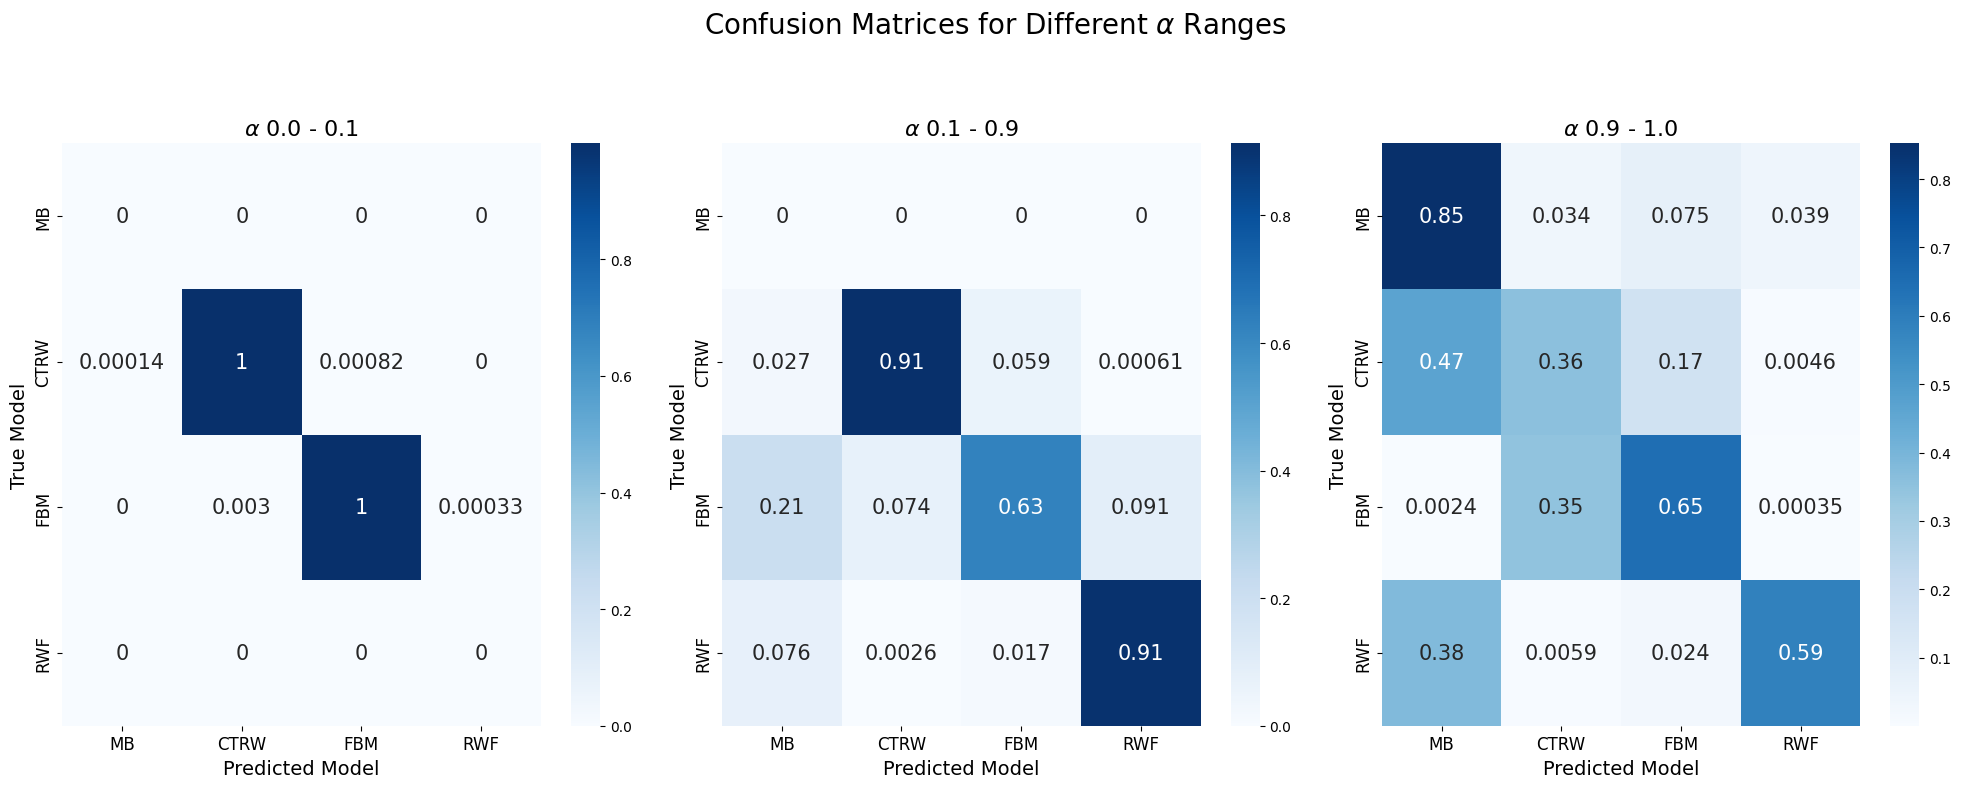

In [29]:
Data = res
create_conf_mat_alpha(Data,  models) #metrics.create_conf_matD(Data,  models)

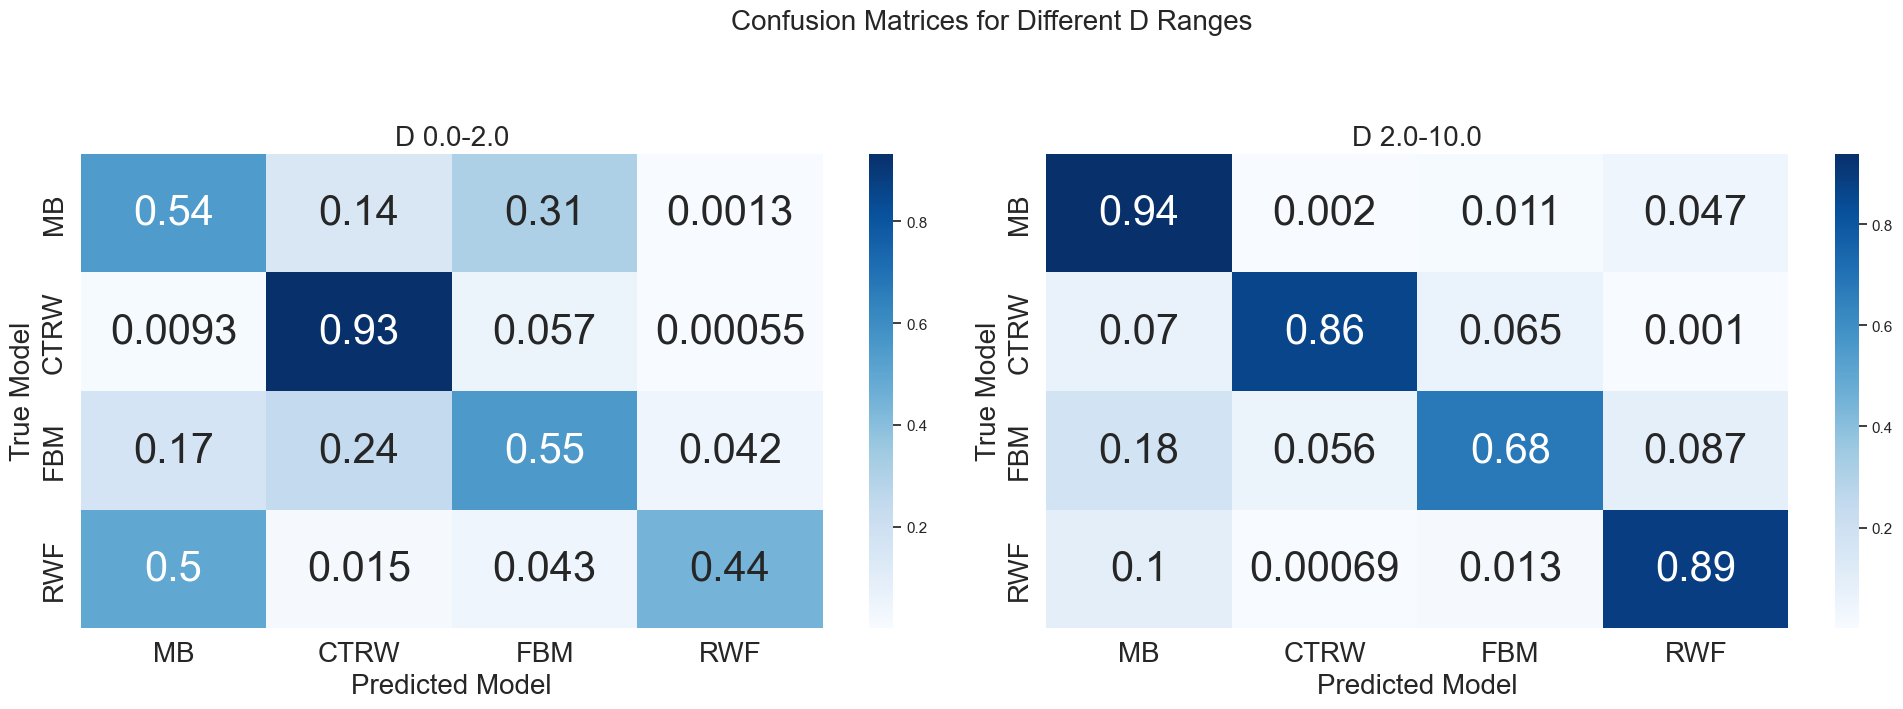

In [51]:
Data = res
create_conf_matD(Data,  models) #metrics.create_conf_matD(Data,  models)

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_29066/1916137730.py:8: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maeD = sns.relplot(


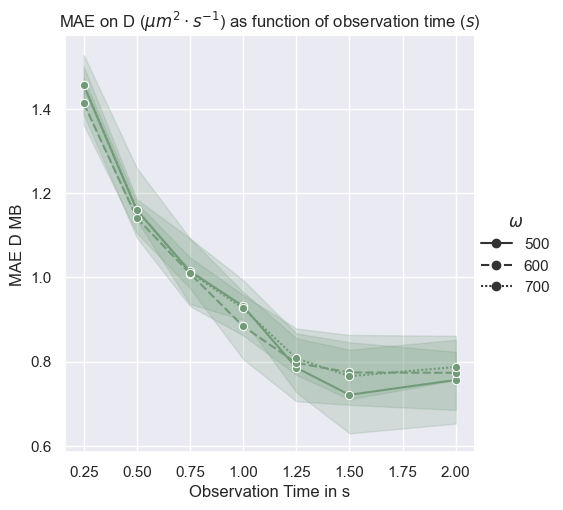

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_29066/1916137730.py:19: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maeDp = sns.relplot(


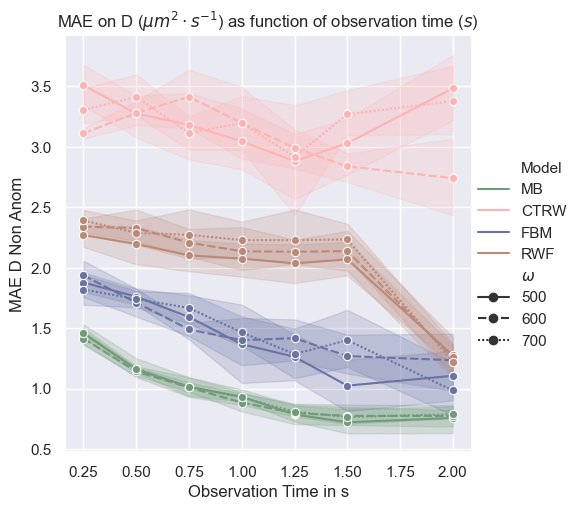

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_29066/1916137730.py:32: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maealpha = sns.relplot(


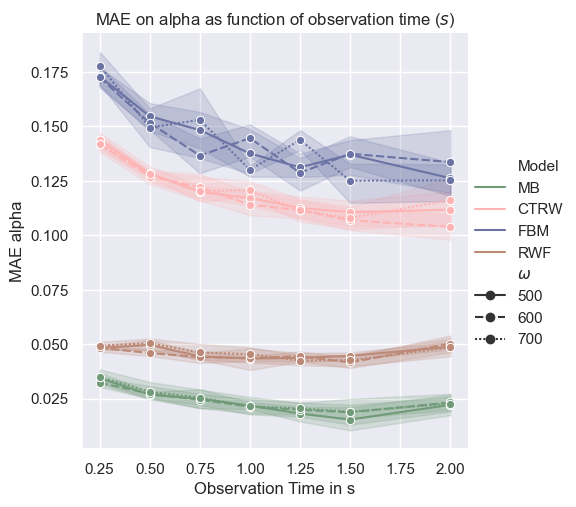

In [9]:
sns.set_theme()
palette3 = ['#719b78','#ffb3b3','#6a73a4','#bc8977']
# MB , CTRW, FBM, RWF

#MAE D
# D follows a uniform law on [0,10]
sns.set_palette(palette3)
maeD = sns.relplot(
    data=fig.loc[fig['Model']=='MB'],
    x = 'Time window' , y = 'MAE D MB', style = '$\omega$',
    markers = "o", kind = "line"
)
maeD.set(title = 'MAE on D ($\mu m^2 \cdot s^{-1}$) as function of observation time ($s$)')
maeD.set_xlabels('Observation Time in s')
plt.show()
maeD.savefig('../fig_4models/mae_D.pdf',dpi=300)

sns.set_palette(palette3)
maeDp = sns.relplot(
    data=fig,#.loc[fig['alpha true']>=0.9],
    x = 'Time window' , y = 'MAE D Non Anom', style = '$\omega$',hue ='Model',
    markers = "o", kind = "line"
)
maeDp.set(title = 'MAE on D ($\mu m^2 \cdot s^{-1}$) as function of observation time ($s$)')
maeDp.set_xlabels('Observation Time in s')
plt.show()
maeDp.savefig('../fig_4models/mae_D_prime.pdf',dpi=300)

#MAE alpha
#alpha follows a uniform law on [0,1] when fBm, CTRW
sns.set_palette(palette3)
maealpha = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'MAE alpha',style = '$\omega$',hue ='Model',
    markers = "o", kind = "line"
)
maealpha.set(title = 'MAE on alpha as function of observation time ($s$)')
maealpha.set_xlabels('Observation Time in s')

plt.show()
maealpha.savefig('../fig_4models/mae_alpha.pdf',dpi=300)

In [10]:
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
time_list = [0.1,0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
models = ['MB','CTRW','FBM','RWF']

fig = metrics.return_f1(Data, omegas,omegas_x,time_list,models)

Figure 2 : F1 Score function of observation time

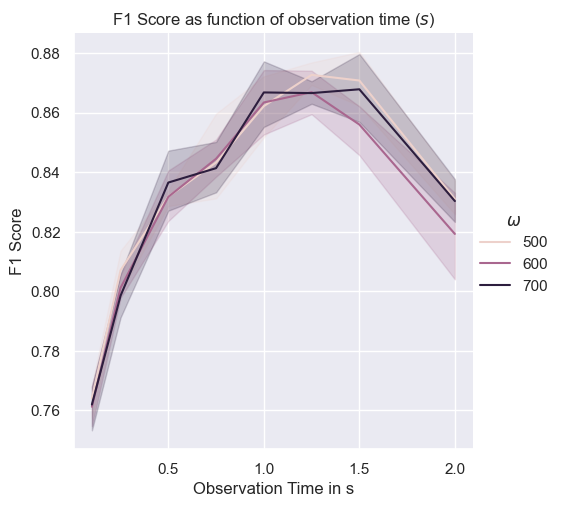

In [11]:
f1score = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'F1 Score',hue = '$\omega$',
    markers = "o", kind = "line"
)
f1score.set(title = 'F1 Score as function of observation time ($s$)')
f1score.set_xlabels('Observation Time in s')
plt.show()
f1score.savefig('../fig_4models/F1score.pdf',dpi=300)



Figure 3 : MAE alpha et D 

In [15]:
#The prediction on test set
Data = res
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
time_list = [0.1,0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
fig = metrics.return_mae_fit_ml(Data, omegas,omegas_x,time_list,models)


/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_29066/2756887092.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maealphavsfit = sns.relplot(


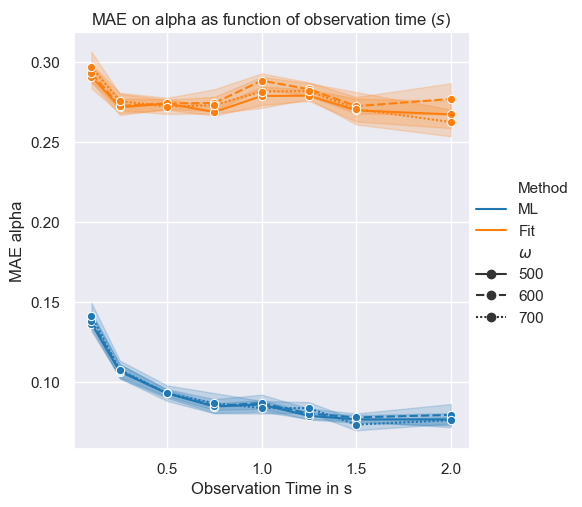

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_29066/2756887092.py:15: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maeDvsfit = sns.relplot(


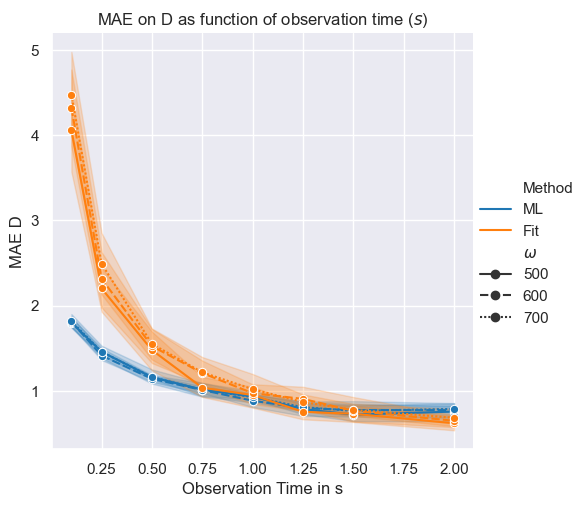

In [16]:

fig['$\omega$']=fig['omega']

sns.set_theme()
sns.set_palette(mypalette)
maealphavsfit = sns.relplot(
    data=fig,#.loc[(fig['omega_x']==300)&(fig['omega']==700),:],
    x = 'Time window' , y = 'MAE alpha',hue ='Method',style = '$\omega$',#  style = '$\omega_x$',
    markers = "o", kind = "line"
)
maealphavsfit.set(title = 'MAE on alpha as function of observation time ($s$)')
maealphavsfit.set_xlabels('Observation Time in s')
maealphavsfit.savefig('../fig_4models/mae_alpha_compare.pdf')
plt.show()

maeDvsfit = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'MAE D',hue ='Method',style = '$\omega$',#  style = '$\omega_x$',
    markers = "o", kind = "line"
)
maeDvsfit.set(title = 'MAE on D as function of observation time ($s$)')
maeDvsfit.set_xlabels('Observation Time in s')
maeDvsfit.savefig('../fig_4models/mae_D_compare.pdf')
plt.show()

Figure 6 : Experimental Data

In [13]:
#Module = joblib.load('../data/new_model_trained_4modelsDlast.pk')

mypalette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#7f7f7f','#bcbd22','#17becf']
palette2 = ['#719b78','#6a73a4','#bc8977']

#Path of the .ptu files
path = '../dat/Data_FCS_Nathan_40nm_Beads/Sample'

files = ['A','B','C','D','E']
glycerol = [48,31,23,12,6]
Res = []
omega = [522,522,522,522,522]
omega_x = [214,214,214,214,214]
for index,file in enumerate(files):
    #The module load the files and make predictions
    res_sample = Module.load_ptu(path+file,t_max_experiment=1,stride=0.05,omega=omega[index],omega_x=omega_x[index],t_max_window=0.5)
    res_sample['Glycerol'] = glycerol[index]
    Res.append(res_sample)

Res = pd.concat(Res)

Number of files =  9
Number of files =  30
Number of files =  30
Number of files =  30
Number of files =  29


In [47]:
#Res.to_pickle(('../dat/beads_4modelsDlast.pk'))
Res = pd.read_pickle('../dat/beads_4modelsDlast.pk')



/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_31157/2445769097.py:10: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.




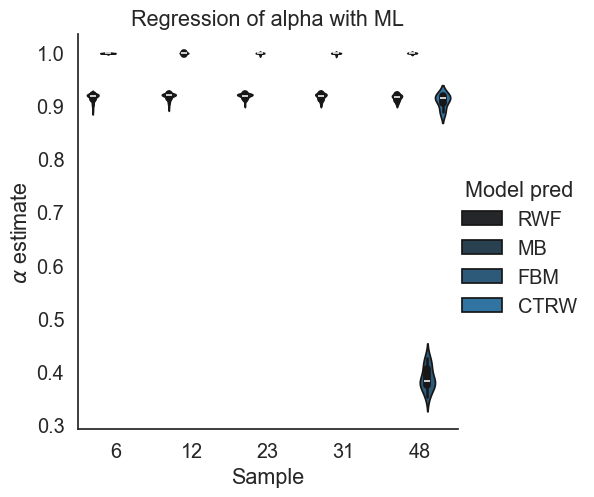

In [48]:
Data = Res
name_encoder = LabelEncoder() #initializing an object of class LabelEncoder
name_encoder.fit(Data['file name'])
Data['file name'] = name_encoder.transform(Data['file name'])



sns.set_theme(font_scale=1.3,style = 'white')
sns.set_palette([mypalette[2],mypalette[2],mypalette[2],mypalette[2]])
alphabead = sns.catplot( data=Data, kind="violin",
    x="Glycerol", y="alpha pred", color=mypalette[0],hue='Model pred')
alphabead.set(title ='Regression of alpha with ML')
alphabead.set_ylabels(chr(945))
alphabead.set(xlabel ='Sample',ylabel = r'$\alpha$ estimate')
alphabead.set(frame_on=True)
alphabead.savefig('../fig_4models/beads_alpha_ml.pdf')
plt.show()



/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_31157/530652237.py:3: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.




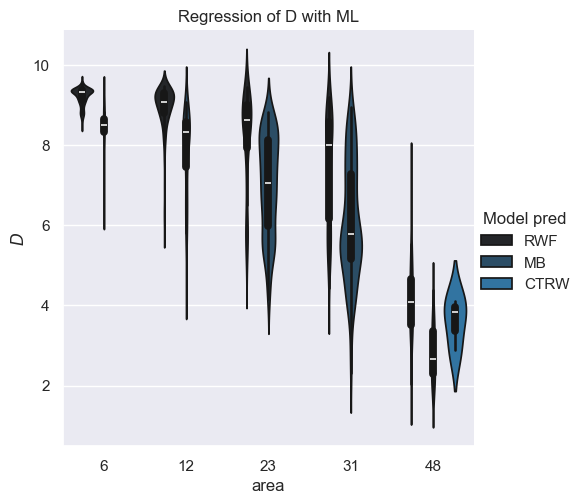

In [11]:
sns.set_palette([mypalette[2],mypalette[2],mypalette[2],mypalette[2]])
sns.set_theme()
Dbead = sns.catplot( data=Data.loc[Data['alpha pred']>=0.90], kind="violin",
    x="Glycerol", y="D pred", density_norm = 'count', color=mypalette[0],hue='Model pred')
Dbead.set(title = 'Regression of D with ML',xlabel='area')
Dbead.set_ylabels("$D$")
Dbead.savefig('../fig_4models/beads_D_ml.pdf')
plt.show()

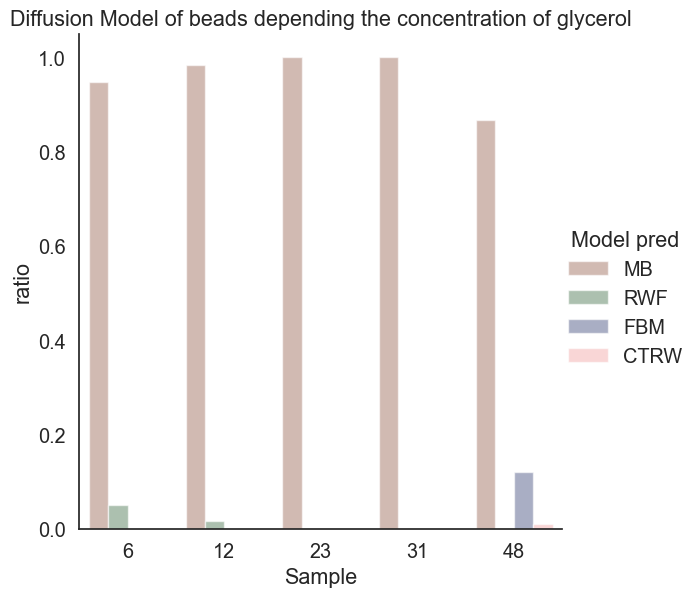

In [52]:
time_list = [0.5]

idx = (Data['alpha pred']>=0.9)
Data.loc[idx,'Model pred']='MB'

model_list = [ 'MB' ,'CTRW', 'FBM','RWF']
for gly in np.unique(Data['Glycerol']):
    for time in time_list:
        for model in model_list:
            #count occurence of each model predicted for each experiments (gly)
            idx = (Data['Glycerol']==gly) & (Data['Time window']==time) & (Data['Model pred']==model)
            Data.loc[idx,'Count']=len(Data.loc[idx,'Time window'])/len(Data.loc[(Data['Glycerol']==gly)& (Data['Time window']==time) ,'Time window'])

sns.set_theme(style="white",font_scale=1.3)
palette3 = ['#bc8977','#719b78','#6a73a4','#ffb3b3']
#Green = Bm, Brown = fBm, Blue = CTRW
sns.set_palette(palette3)
modelpred =  sns.catplot(
    data=Data
    , kind="bar",
    x="Glycerol", y="Count", hue="Model pred",
     palette=palette3, alpha=.6, height=6
)
modelpred.set(xlabel ='Sample',ylabel = 'ratio')
modelpred.set(title = "Diffusion Model of beads depending the concentration of glycerol")
modelpred.savefig('../fig_4models/beads_model.pdf')
plt.show()

In [4]:
Data = metrics.normalize_data4plot(Res)

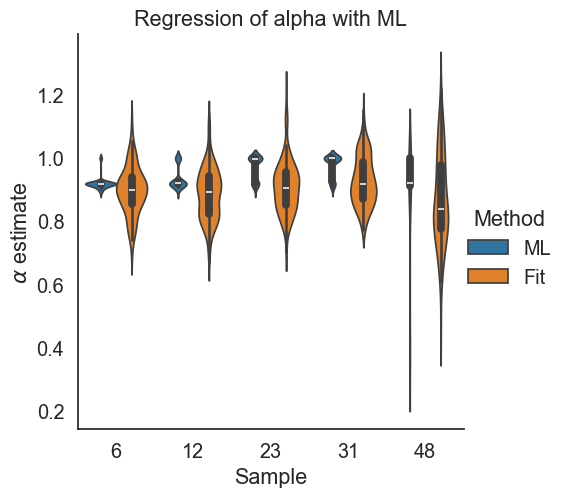

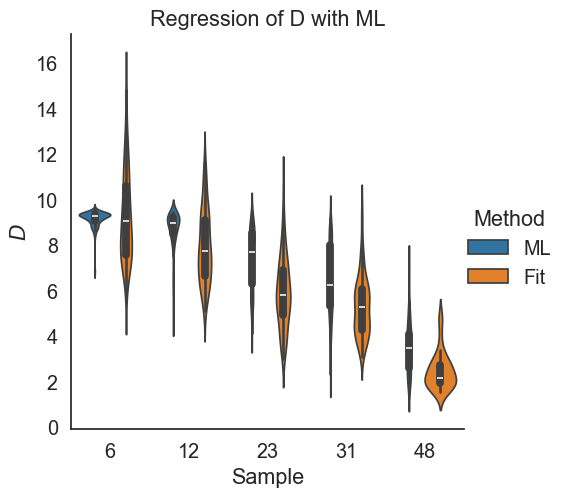

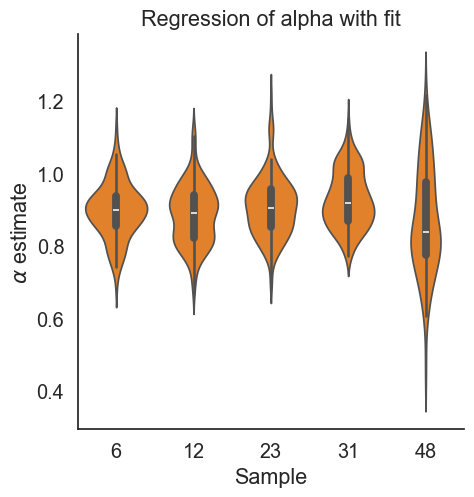

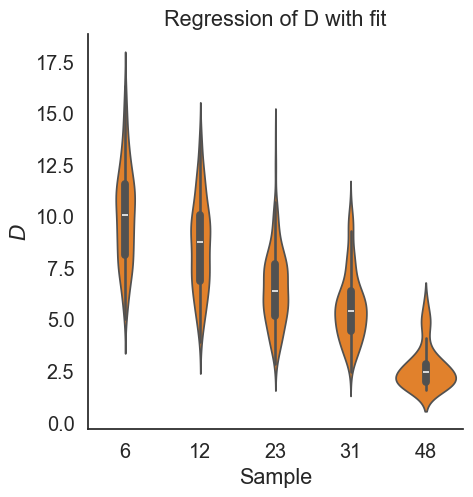

In [5]:
sns.set_theme(font_scale=1.3,style = 'white')
sns.set_palette(mypalette)

alphabeadsvsfit = sns.catplot( data=Data.loc[(Data['alpha']!=2),:], kind="violin",
    x="Glycerol", y='alpha',hue = 'Method',inner = 'box')
alphabeadsvsfit.set(title ='Regression of alpha with ML')
alphabeadsvsfit.set_ylabels(chr(945))
alphabeadsvsfit.set(xlabel ='Sample',ylabel = r'$\alpha$ estimate')
alphabeadsvsfit.set(frame_on=True)
alphabeadsvsfit.savefig('../fig_4models/beads_alpha_compare.pdf')
plt.show()


Dbeadsvsfit = sns.catplot( data=Data.loc[(Data['alpha']>=0.9)&(Data['alpha']!=2),:], kind="violin",
    x="Glycerol", y="D",hue='Method',inner = 'box',density_norm = 'area')
Dbeadsvsfit.set(title = 'Regression of D with ML',xlabel='Sample')
Dbeadsvsfit.set_ylabels("$D$")
Dbeadsvsfit.savefig('../fig_4models/beads_D_compare.pdf')
plt.show()


alphabeadsfit = sns.catplot( data=Data.loc[(Data['alpha']!=2)&(Data['Method']=='Fit')], kind="violin",
    x="Glycerol", y="alpha",color = mypalette[1])
alphabeadsfit.set(title ='Regression of alpha with fit')
alphabeadsfit.set_ylabels(chr(945))
alphabeadsfit.set(xlabel ='Sample',ylabel = r'$\alpha$ estimate')
alphabeadsfit.set(frame_on=True)
alphabeadsfit.savefig('../fig_4models/beads_alpha_fit.pdf')
plt.show()


Dbeadsfit = sns.catplot( data=Data.loc[(Data['alpha']>=0.9)&(Data['Method']=='Fit')], kind="violin",
    x="Glycerol", y="D",color = mypalette[1])
Dbeadsfit.set(title = 'Regression of D with fit',xlabel='Sample')
Dbeadsfit.set_ylabels("$D$")
Dbeadsfit.savefig('../fig_4models/beads_D_fit.pdf')
plt.show()

Experimental data : overview

In [6]:
files = ['A','B','C','D','E','F','Control']
Dtheo = [ 2.35,4.85,6.37,8.71,10.4,9.91,12]
glycerol = [48,31,23,12,6]

table = metrics.create_recap_table(Data,files,Dtheo,glycerol)
table.write_image("../fig_4models/table_recap.pdf", scale=2)

Figure 7 : Latent space of classifier on beads through time

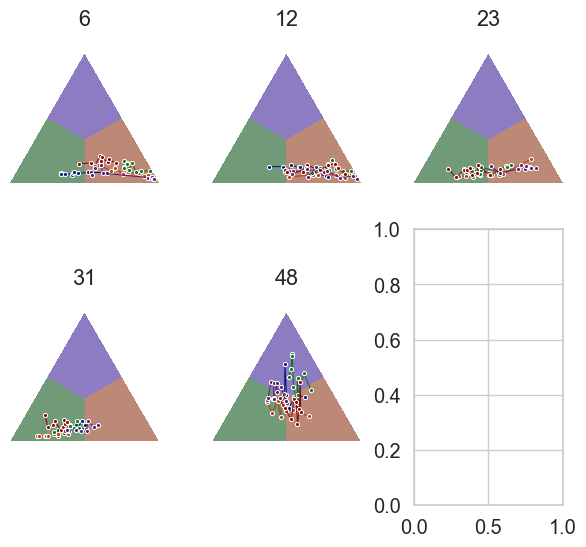

In [7]:
data_beads = Res
fig = metrics.plot_ternary(data_beads)
fig.savefig('../fig_4models/beads_model_pred_traj.png',dpi=600)
plt.show()

Figure 5 : Dynamical Analysis

In [38]:
data_alpha = pd.read_pickle('../dat/df_A_last_0').rename(columns={"omega_x": "omega_x", "omega": "omega","Tmax":"Time window"})
#The stride is about 0.05 s
data_alpha['Time'] = data_alpha['window number']*0.05
print("File list ", np.unique(data_alpha['file name'].to_numpy()))
data_alpha = Module.predict_dataframe(data_alpha)

data_D = pd.read_pickle('../dat/df_D_last_0').rename(columns={"omega_x": "omega_x", "omega": "omega","Tmax":"Time window"})
#The stride is about 0.05 s
data_D['Time'] = data_D['window number']*0.05
print("File list ", np.unique(data_D['file name'].to_numpy()))
data_D = Module.predict_dataframe(data_D)
sns.set_theme(font_scale=1.3,style = 'white')

File list  ['10' '11' '12' '20' '21' '30' '31' '41']
File list  ['17' '24' '42']


In [ ]:
#Module.load_csv_evo('/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/Datas/FCS_AVOL',10,'avolnew',1)
#data_alpha = pd.read_pickle('avolnew/prediction0.pk')

Time max :  8.5
Start :  0.00155591 End :  9.01998


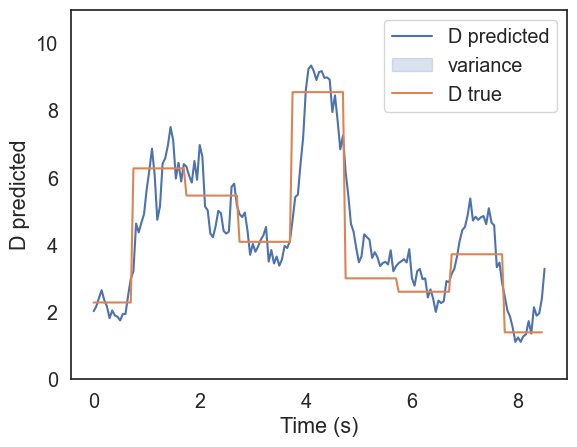

In [39]:
file = '42'
idx = (data_D['file name']==file)&(data_D['Dynamic']=='D')&(data_D['Time']<=8.5)
dat = data_D.loc[idx,:]
dat.reset_index(inplace=True,drop=True)
D = np.repeat(dat['val'][1],20).T

kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
#D = np.convolve(D, kernel, mode='same')[5:-25]
D = D[5:-25]


print("Time max : ",dat.Time.max())
print("Start : ",dat.Start.iloc[0],"End : ",dat.End.iloc[0])
fig = plt.figure()
fig.ax = sns.lineplot(data=dat,x = 'Time',y='D pred')
fig.ax.plot(np.arange(0,8.5,5e-2),D)
fig.ax.legend((r'D predicted','variance',r'D true','variance'))
fig.ax.set(ylim= (0,11),ylabel=r"D predicted",xlabel=r"Time (s)")
fig.savefig('../fig_4models/evol_D.pdf')
plt.show()


Time max :  8.5
Start :  0.0 End :  9.99997


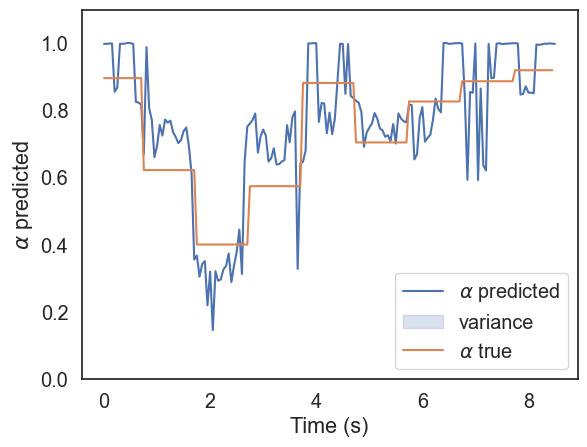

In [40]:
file = '21'
#for file in np.unique(data_alpha['file name'])[16:19]:
idx = (data_alpha['file name']==file)&(data_alpha['Dynamic']=='A')&(data_alpha['omega_x']==250)&(data_alpha['omega']==500)&(data_alpha['Time']<=8.5)
dat = data_alpha.loc[idx,:]
dat.reset_index(inplace=True,drop=True)

alpha = np.repeat(dat['val'][0],20).T
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
#alpha = np.convolve(alpha, kernel, mode='same')[5:-25]#[5:-6]
alpha = alpha[5:-25]

print("Time max : ",dat.Time.max())
print("Start : ",dat.Start.iloc[0],"End : ",dat.End.iloc[0])
fig = plt.figure()
fig.ax = sns.lineplot(data=dat,x = 'Time',y='alpha pred')
fig.ax.plot(np.arange(0,8.5,5e-2),alpha)#fig.ax.plot(np.arange(0,10,5e-2)[:-11],alpha)
fig.ax.legend((r'$\alpha$ predicted','variance',r'$\alpha$ true','variance'))
fig.ax.set(ylim= (0,1.1),ylabel=r"$\alpha$ predicted",xlabel=r"Time (s)")
fig.savefig('../fig_4models/evol_alpha.pdf')
plt.show()


In [41]:
data_D = pd.read_pickle('../dat/data_D_evol.pk')
data_alpha = pd.read_pickle('../dat/data_alpha_evol.pk')

data_D = Module.predict_dataframe(data_D)
data_alpha = Module.predict_dataframe(data_alpha)

/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning:

divide by zero encountered in divide

/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning:

invalid value encountered in divide

/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning:

divide by zero encountered in divide

/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning:

invalid value encountered in divide



In [42]:
time_list = np.unique(data_D['Time window'])
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
fig = metrics.compute_dynamic_mae(data_D,data_alpha,time_list,omegas,omegas_x)

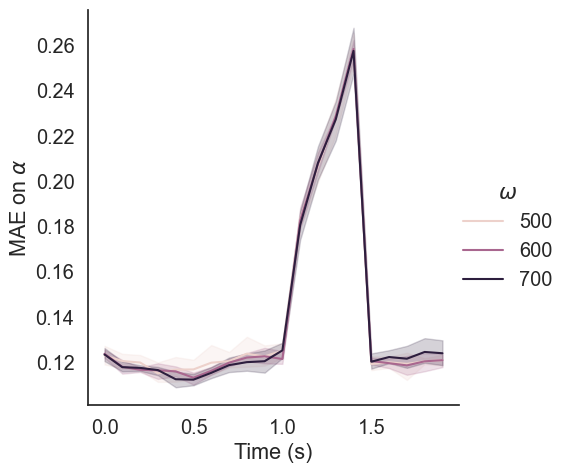

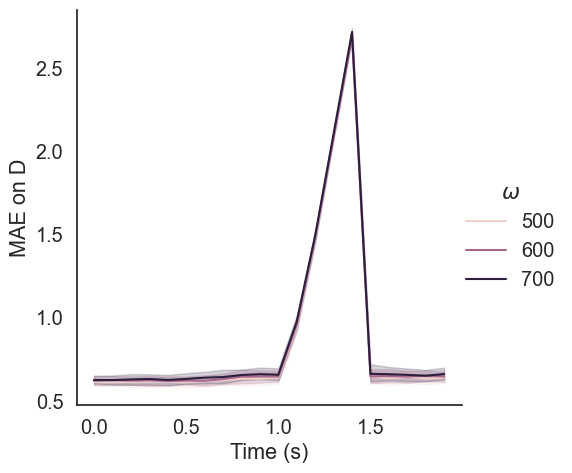

In [45]:
data = fig #res
stride = 0.1
data['Time'] = data['window number']*0.1
alphaevol = sns.relplot(data=data.loc[data['Dynamic']=='A'],x='Time',y='MAE',hue = '$\omega$',
    markers = "o",kind='line')
#alphaevol.legend((r'$\alpha$ predicted','variance',r'$\alpha$ true','variance'))
alphaevol.set(ylabel=r"MAE on $\alpha$",xlabel=r"Time (s)")
alphaevol.savefig('../fig_4models/mae_evol_alpha.pdf')
plt.show()

Devol = sns.relplot(data=data.loc[data['Dynamic']=='D'],x='Time',y='MAE',hue = '$\omega$',
    markers = "o",kind='line')
#Devol.legend((r'D predicted','variance',r'D true','variance'))
Devol.set(ylabel=r"MAE on D",xlabel=r"Time (s)")
Devol.savefig('../fig_4models/mae_evol_D.pdf')
plt.show()

Figure 4 : Performance as function of illumination

In [ ]:
#Load already computed prediction on test illu set
#datasets = pd.read_pickle('../dat/test_illu.pk').drop(['G'],axis=1)
#Load dataset on illumination and make pred (it's quite long)


data_rwf = []
for dataset in range(18):
    print(dataset)
    data_rwf.append(pd.read_pickle('/Users/nathanquiblier/Desktop/DATA RWF Illu/data_rwf'+str(dataset)+'.pk'))

data_rwf = pd.concat(data_rwf)
len_rwf = data_rwf.shape[0]
data_rwf = [data_rwf]


datasets = pd.read_pickle('../dat/test_illu.pk').drop(['alpha pred','D pred','Model pred'],axis=1)
datasets['Model'] = datasets['Model'].astype('category')
count = datasets['Model'].value_counts()
count_time = datasets['Time window'].value_counts()
print(count)
print(count_time)
size_by_model =  count[0]


for model in ['MB','FBM','CTRW']:
    data_rwf.append(datasets.loc[datasets['Model']==model,:].sample(n=len_rwf))
data_rwf = pd.concat(data_rwf)
print(data_rwf.shape)
data_rwf = pd.concat([datasets,data_rwf.sample(n=size_by_model)]).to_pickle('../dat/datasets_illu_4models.pk')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Model
CTRW    1507696
FBM     1507696
MB      1507696
Name: count, dtype: int64
Time window
0.10    2527913
0.25     931686
0.50     398532
0.75     266093
1.00     133011
1.50     132946
1.25     132907
Name: count, dtype: int64
(3691584, 15)


In [ ]:
#data_rwf.to_pickle('../dat/datasets_illu_4models.pk')
#data_rwf = pd.concat([datasets,data_rwf.sample(n=size_by_model)]).to_pickle('../dat/datasets_illu_4models.pk')

In [4]:
del datasets
del data_rwf

In [3]:
datasets = pd.read_pickle('../dat/datasets_illu_4models.pk')
print('dataset load')
datasets = Module.predict_dataframe(datasets)

KeyboardInterrupt: 

In [1]:
import os
import pandas as pd
import numpy as np
import joblib
from module import MlfcsTrainer

#Module = joblib.load('../data/new_model_trained_4modelsDlast.pk')
Module = joblib.load('../data/model_trained_4models_grid.pk')
# Load the dataset
datasets = pd.read_pickle('../dat/datasets_illu_4models.pk')
print('Dataset loaded')

# Define the number of chunks and output folder
num_chunks = 15  # Replace with your desired number of chunks
output_folder = '../dat/illu_4models_grid/'  # Replace with your desired folder path
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Split the dataset into chunks
chunks = np.array_split(datasets, num_chunks)

# Process each chunk
for i, chunk in enumerate(chunks):
    print(f'Processing chunk {i+1}/{num_chunks}')

    # Apply the prediction
    processed_chunk = Module.predict_dataframe(chunk)

    # Save the processed chunk to a file
    output_file = os.path.join(output_folder, f'processed_chunk_{i+1}.pkl')
    processed_chunk.to_pickle(output_file)

    print(f'Saved chunk {i+1} to {output_file}')

print('All chunks processed and saved.')


: 

In [20]:
#del datasets
#del processed_chunk

# Define the folder containing the processed chunks and the column to drop
input_folder = '../dat/illu_4models/'  # Replace with the path to your folder
column_to_drop = 'G'

# List all processed files in the folder
processed_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith('.pkl')]

# Initialize an empty list to store the processed chunks
chunks_without_column = []

# Load each file, drop the column, and append to the list
for file in processed_files:
    print(f'Loading {file}')
    chunk = pd.read_pickle(file)

    # Drop the specified column if it exists
    if column_to_drop in chunk.columns:
        chunk = chunk.drop(columns=[column_to_drop])
        print(f'Dropped column {column_to_drop} from {file}')

    chunks_without_column.append(chunk)

# Concatenate all chunks into a single dataset
datasets = pd.concat(chunks_without_column, ignore_index=True)
print('All files loaded and concatenated into a single dataset.')


Loading ../dat/illu_4models/processed_chunk_2.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_2.pkl
Loading ../dat/illu_4models/processed_chunk_3.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_3.pkl
Loading ../dat/illu_4models/processed_chunk_1.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_1.pkl
Loading ../dat/illu_4models/processed_chunk_4.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_4.pkl
Loading ../dat/illu_4models/processed_chunk_5.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_5.pkl
Loading ../dat/illu_4models/processed_chunk_7.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_7.pkl
Loading ../dat/illu_4models/processed_chunk_6.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_6.pkl
Loading ../dat/illu_4models/processed_chunk_8.pkl
Dropped column G from ../dat/illu_4models/processed_chunk_8.pkl
Loading ../dat/illu_4models/processed_chunk_9.pkl
Dropped column G from ../dat/illu_4mod

In [29]:
#datasets.to_pickle('../dat/res_illu_4models.pk')
#datasets = pd.read_pickle('../dat/res_illu_4models.pk')

import pandas as pd

# Assuming 'datasets' is your DataFrame
rwf_count = datasets['Model'].value_counts()['RWF']

# Function to sample rows for each model
def sample_model_rows(df, model, count):
    return df[df['Model'] == model].sample(n=count, random_state=42)

# Sample rows for each model
balanced_datasets = pd.concat([
    sample_model_rows(datasets, model, rwf_count)
    for model in datasets['Model'].unique()
])

# Shuffle the resulting dataset
datasets = balanced_datasets.sample(frac=1, random_state=42).reset_index(drop=True)



In [30]:
count = datasets['Model'].value_counts()
print(count)

Model
FBM     377246
RWF     377246
CTRW    377246
MB      377246
Name: count, dtype: int64


In [31]:

time_list = [ 0.25, 0.5, 0.75, 1.0,  1.5]
res = metrics.metrics_fn_illu(datasets,time_list)


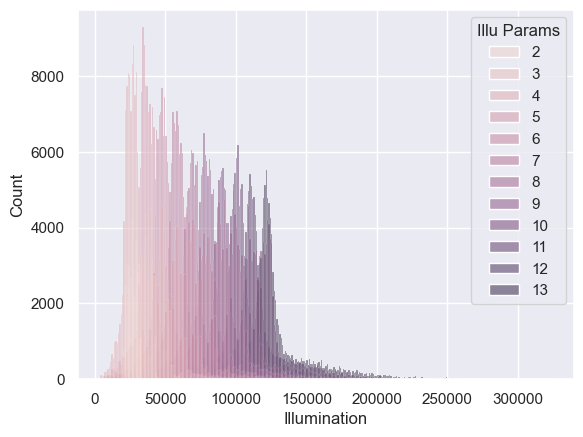

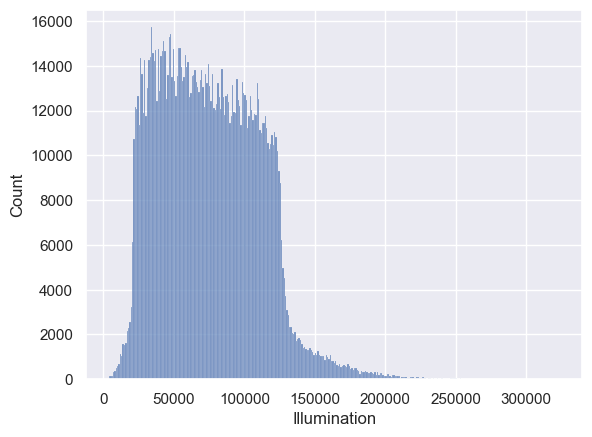

In [32]:
#datasets = res_illu
illu_distrib = plt.figure()
illu_distrib.ax = sns.histplot(data=datasets,x='Illumination',hue='Illu Params')
illu_distrib.savefig('../fig_4models/illu_distrib.pdf')
plt.show()

illu_distrib = plt.figure()
illu_distrib.ax = sns.histplot(data=datasets,x='Illumination')
illu_distrib.savefig('../fig_4models/illu_distrib2.pdf')
plt.show()

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_31157/913370518.py:4: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



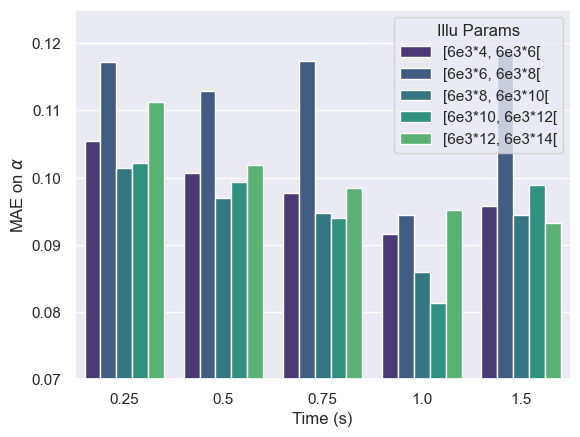

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_31157/913370518.py:10: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



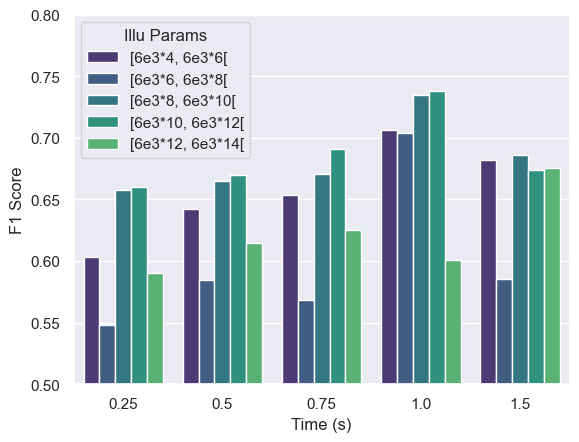

In [37]:

xlegend = ['[6e3*4 , 6e3*6[' , '[6e3*6 , 6e3*8[', '[6e3*8 , 6e3*10[' ,  '[6e3*10 , 6e3*12[',  '[6e3*12 , 6e3*14[']

mae_illu_param = plt.figure()
mae_illu_param.ax = sns.barplot(data = res,x='Time window',y='MAE',hue='Illu Params',palette=sns.color_palette("viridis"))
mae_illu_param.ax.set(ylabel=r"MAE on $\alpha$",xlabel=r"Time (s)",ylim=(0.07,0.125))
mae_illu_param.savefig('../fig_4models/mae_illu_param.pdf')
plt.show()

f1_illu_param = plt.figure()
f1_illu_param.ax = sns.barplot(data = res,x='Time window',y='F1',hue='Illu Params',palette=sns.color_palette("viridis"))
f1_illu_param.ax.set(ylabel=r"F1 Score",xlabel=r"Time (s)",ylim=(0.5,0.8))
f1_illu_param.savefig('../fig_4models/f1_illu_param.pdf')
plt.show()



In [3]:
#Load already computed prediction on test illu set
#datasets = pd.read_pickle('../dat/test_illu.pk').drop(['G'],axis=1)
#Load dataset on illumination and make pred (it's quite long)


data_rwf = []
for dataset in range(18):
    print(dataset)
    data_rwf.append(pd.read_pickle('/Users/nathanquiblier/Desktop/DATA RWF Illu/data_rwf'+str(dataset)+'.pk'))
    data_rwf.append(pd.read_pickle('/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/Datas/datlast/data_rwf'+str(dataset)+'.pk'))

data_rwf = pd.concat(data_rwf)
len_rwf = data_rwf.shape[0]
data_rwf = [data_rwf]


datasets = pd.read_pickle('../dat/test_illu.pk').drop(['alpha pred','D pred','Model pred'],axis=1)
datasets['Model'] = datasets['Model'].astype('category')
count = datasets['Model'].value_counts()
count_time = datasets['Time window'].value_counts()
print(count)
print(count_time)
size_by_model =  count[0]


for model in ['MB','FBM','CTRW']:
    data_rwf.append(datasets.loc[datasets['Model']==model,:])#.sample(n=len_rwf))
data_rwf = pd.concat(data_rwf)
print(data_rwf.shape)
data_rwf = pd.concat([datasets,data_rwf.sample(n=size_by_model)]).to_pickle('../dat/datasets_illu_4modelslast.pk')

del datasets
del data_rwf

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Model
CTRW    1507696
FBM     1507696
MB      1507696
Name: count, dtype: int64
Time window
0.10    2527913
0.25     931686
0.50     398532
0.75     266093
1.00     133011
1.50     132946
1.25     132907
Name: count, dtype: int64
(6914784, 15)


In [ ]:
import os
import pandas as pd
import numpy as np
import joblib
from module import MlfcsTrainer

Module = joblib.load('../data/new_model_trained_4modelsDlast.pk')
# Load the dataset
datasets = pd.read_pickle('../dat/datasets_illu_4modelslast.pk')
print('Dataset loaded')

# Define the number of chunks and output folder
num_chunks = 10  # Replace with your desired number of chunks
output_folder = '../dat/illu_4modelslast/'  # Replace with your desired folder path
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Split the dataset into chunks
chunks = np.array_split(datasets, num_chunks)

# Process each chunk
for i, chunk in enumerate(chunks):
    print(f'Processing chunk {i+1}/{num_chunks}')

    # Apply the prediction
    processed_chunk = Module.predict_dataframe(chunk)

    # Save the processed chunk to a file
    output_file = os.path.join(output_folder, f'processed_chunk_{i+1}.pkl')
    processed_chunk.to_pickle(output_file)

    print(f'Saved chunk {i+1} to {output_file}')

print('All chunks processed and saved.')


Dataset loaded
Processing chunk 1/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 1 to ../dat/illu_4modelslast/processed_chunk_1.pkl
Processing chunk 2/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 2 to ../dat/illu_4modelslast/processed_chunk_2.pkl
Processing chunk 3/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 3 to ../dat/illu_4modelslast/processed_chunk_3.pkl
Processing chunk 4/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 4 to ../dat/illu_4modelslast/processed_chunk_4.pkl
Processing chunk 5/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 5 to ../dat/illu_4modelslast/processed_chunk_5.pkl
Processing chunk 6/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 6 to ../dat/illu_4modelslast/processed_chunk_6.pkl
Processing chunk 7/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 7 to ../dat/illu_4modelslast/processed_chunk_7.pkl
Processing chunk 8/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 8 to ../dat/illu_4modelslast/processed_chunk_8.pkl
Processing chunk 9/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 9 to ../dat/illu_4modelslast/processed_chunk_9.pkl
Processing chunk 10/10


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:201: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Saved chunk 10 to ../dat/illu_4modelslast/processed_chunk_10.pkl
All chunks processed and saved.


: 

In [3]:
#del datasets
#del processed_chunk

# Define the folder containing the processed chunks and the column to drop
input_folder = '../dat/illu_4modelslast/'  # Replace with the path to your folder
column_to_drop = 'G'

# List all processed files in the folder
processed_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith('.pkl')]

# Initialize an empty list to store the processed chunks
chunks_without_column = []

# Load each file, drop the column, and append to the list
for file in processed_files:
    print(f'Loading {file}')
    chunk = pd.read_pickle(file)

    # Drop the specified column if it exists
    if column_to_drop in chunk.columns:
        chunk = chunk.drop(columns=[column_to_drop])
        print(f'Dropped column {column_to_drop} from {file}')

    chunks_without_column.append(chunk)

# Concatenate all chunks into a single dataset
datasets = pd.concat(chunks_without_column, ignore_index=True)
print('All files loaded and concatenated into a single dataset.')


Loading ../dat/illu_4modelslast/processed_chunk_2.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_2.pkl
Loading ../dat/illu_4modelslast/processed_chunk_3.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_3.pkl
Loading ../dat/illu_4modelslast/processed_chunk_1.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_1.pkl
Loading ../dat/illu_4modelslast/processed_chunk_4.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_4.pkl
Loading ../dat/illu_4modelslast/processed_chunk_5.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_5.pkl
Loading ../dat/illu_4modelslast/processed_chunk_7.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_7.pkl
Loading ../dat/illu_4modelslast/processed_chunk_6.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_6.pkl
Loading ../dat/illu_4modelslast/processed_chunk_8.pkl
Dropped column G from ../dat/illu_4modelslast/processed_chunk_8.pkl
Loading ../dat/illu_4mod

In [5]:
#datasets.to_pickle('../dat/res_illu_4models.pk')
#datasets = pd.read_pickle('../dat/res_illu_4models.pk')

import pandas as pd

# Assuming 'datasets' is your DataFrame
rwf_count = datasets['Model'].value_counts()['RWF']

# Function to sample rows for each model
def sample_model_rows(df, model, count):
    return df[df['Model'] == model].sample(n=count, random_state=42)

# Sample rows for each model
balanced_datasets = pd.concat([
    sample_model_rows(datasets, model, rwf_count)
    for model in datasets['Model'].unique()
])


count = datasets['Model'].value_counts()
print(count)

# Shuffle the resulting dataset
datasets = balanced_datasets.sample(frac=1, random_state=42).reset_index(drop=True)

count = datasets['Model'].value_counts()
print(count)



Model
CTRW    521771
RWF     521771
FBM     521771
MB      521771
Name: count, dtype: int64
Model
RWF     521771
MB      521771
FBM     521771
CTRW    521771
Name: count, dtype: int64


In [6]:

time_list = [ 0.25, 0.5, 0.75, 1.0,  1.5]
res = metrics.metrics_fn_illu(datasets,time_list)


/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_82521/1105250834.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  mae_illu_param.ax = sns.barplot(data = res,x='Time window',y='MAE',hue='Illu Params',palette=sns.color_palette("viridis"))


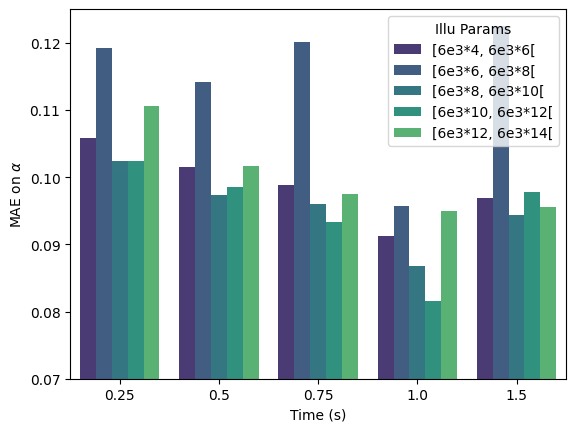

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_82521/1105250834.py:10: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  f1_illu_param.ax = sns.barplot(data = res,x='Time window',y='F1',hue='Illu Params',palette=sns.color_palette("viridis"))


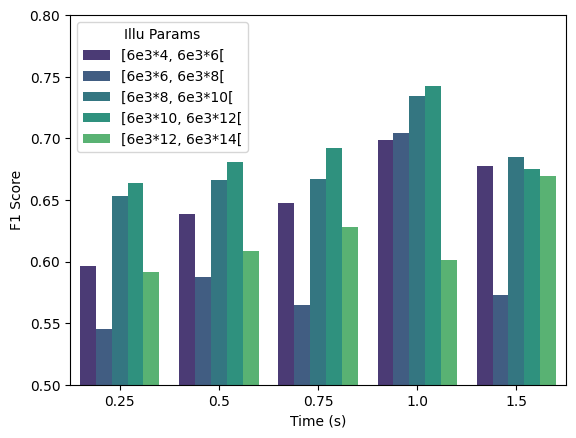

In [7]:

xlegend = ['[6e3*4 , 6e3*6[' , '[6e3*6 , 6e3*8[', '[6e3*8 , 6e3*10[' ,  '[6e3*10 , 6e3*12[',  '[6e3*12 , 6e3*14[']

mae_illu_param = plt.figure()
mae_illu_param.ax = sns.barplot(data = res,x='Time window',y='MAE',hue='Illu Params',palette=sns.color_palette("viridis"))
mae_illu_param.ax.set(ylabel=r"MAE on $\alpha$",xlabel=r"Time (s)",ylim=(0.07,0.125))
mae_illu_param.savefig('../fig_4models/mae_illu_paramlast.pdf')
plt.show()

f1_illu_param = plt.figure()
f1_illu_param.ax = sns.barplot(data = res,x='Time window',y='F1',hue='Illu Params',palette=sns.color_palette("viridis"))
f1_illu_param.ax.set(ylabel=r"F1 Score",xlabel=r"Time (s)",ylim=(0.5,0.8))
f1_illu_param.savefig('../fig_4models/f1_illu_paramlast.pdf')
plt.show()

